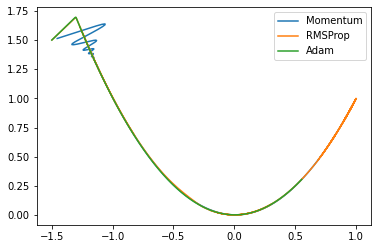

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Función de Rosenbrock
def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

# Gradiente de la función de Rosenbrock
def gradient_rosenbrock(x, y):
    return np.array([-2 * (1 - x) - 400 * x * (y - x ** 2), 200 * (y - x ** 2)])

# Método de gradiente descendente con Momentum
def momentum(x0, y0, alpha, beta, num_iters):
    x = x0
    y = y0
    v = np.zeros((2,))
    history = np.zeros((num_iters, 2))
    for i in range(num_iters):
        grad = gradient_rosenbrock(x, y)
        v = beta * v + (1 - beta) * grad
        x -= alpha * v[0]
        y -= alpha * v[1]
        history[i, :] = [x, y]
    return history

# Método de gradiente descendentecon RMSProp
def rmsprop(x0, y0, alpha, beta, epsilon, num_iters):
    x = x0
    y = y0
    s = np.zeros((2,))
    history = np.zeros((num_iters, 2))
    for i in range(num_iters):
        grad = gradient_rosenbrock(x, y)
        s = beta * s + (1 - beta) * grad ** 2
        x -= alpha * grad[0] / np.sqrt(s[0] + epsilon)
        y -= alpha * grad[1] / np.sqrt(s[1] + epsilon)
        history[i, :] = [x, y]
    return history

# Método de gradiente descendente con Adam
def adam(x0, y0, alpha, beta1, beta2, epsilon, num_iters):
    x = x0
    y = y0
    m = np.zeros((2,))
    v = np.zeros((2,))
    history = np.zeros((num_iters, 2))
    for i in range(num_iters):
        grad = gradient_rosenbrock(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad ** 2
        m_hat = m / (1 - beta1 ** (i + 1))
        v_hat = v / (1 -beta2 ** (i + 1))
        x -= alpha * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= alpha * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        history[i, :] = [x, y]
    return history

# Parámetros
alpha = 0.001
beta = 0.9
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
num_iters = 9000
# Punto inicial
x0 = -1.5
y0 = 1.5

# Ejecución de los métodos
# momentum_history = momentum(x0, y0, alpha, beta, num_iters)
rmsprop_history = rmsprop(x0, y0, alpha, beta, epsilon, num_iters)
# adam_history = adam(x0, y0, alpha, beta1, beta2, epsilon, num_iters)

# Gráfica
# plt.plot(momentum_history[:, 0], momentum_history[:, 1], label='Momentum')
plt.plot(rmsprop_history[:, 0], rmsprop_history[:, 1], label='RMSProp')
# plt.plot(adam_history[:, 0], adam_history[:, 1], label='Adam')
plt.legend()
plt.show()